# Random Over-sampling with Smoothing


Để không sao chép dữ liệu, sau khi trích xuất mẫu ngẫu nhiên, chúng ta nhân giá trị của mẫu với một số lấy xét đến sự phân tán của dữ liệu, nhằm tạo ra các ví dụ nhân tạo.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [13]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [14]:
X.head()

,VarA,VarB
0,-0.755733,2.013229
2,0.844118,0.470464
3,2.064860,-0.010932
4,-0.436840,0.458024
5,1.138826,-0.266161


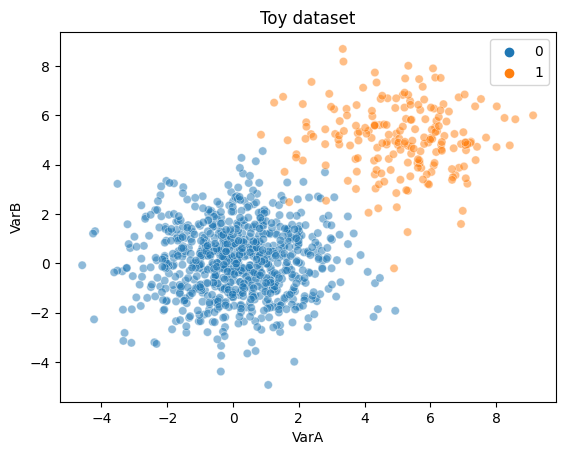

In [15]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling with smoothing

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)



Chúng ta sẽ thử các tham số shrinkage khác nhau để đánh giá tác động của chúng.

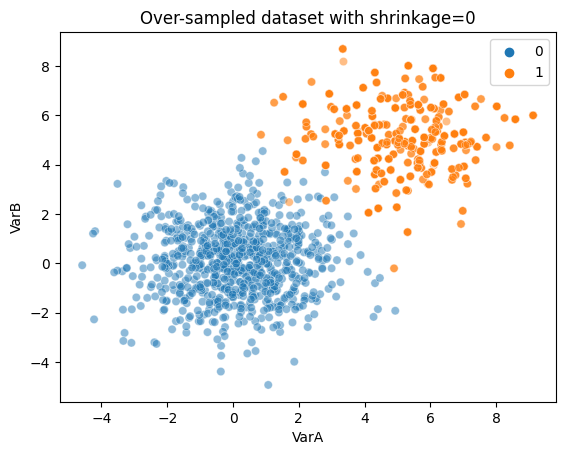

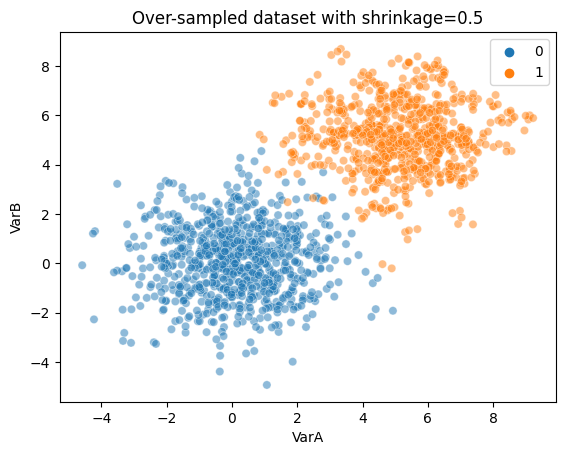

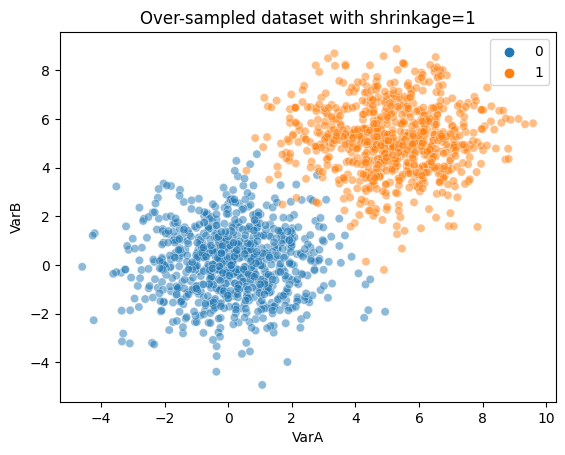

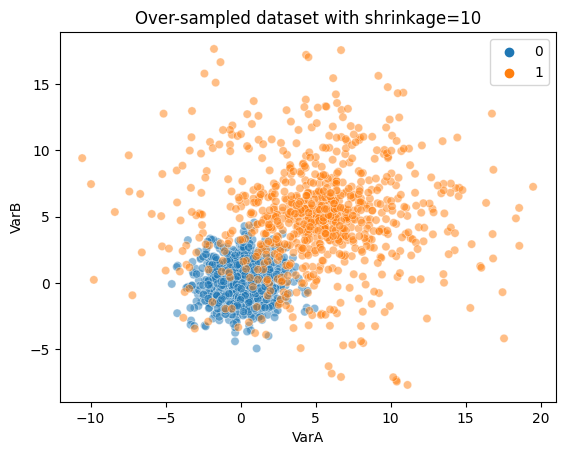

In [16]:
for shrink in [0, 0.5, 1, 10]:

    ros = RandomOverSampler(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,  # for reproducibility
        shrinkage = shrink,
    )  

    X_res, y_res = ros.fit_resample(X, y)
    
    # plot of resampled data

    sns.scatterplot(
        data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
    )

    plt.title('Over-sampled dataset with shrinkage={}'.format(shrink))
    plt.show()

The bigger the shrinkage the more far away from the center of the distribution the samples are created.

# Multiclass

## Create data

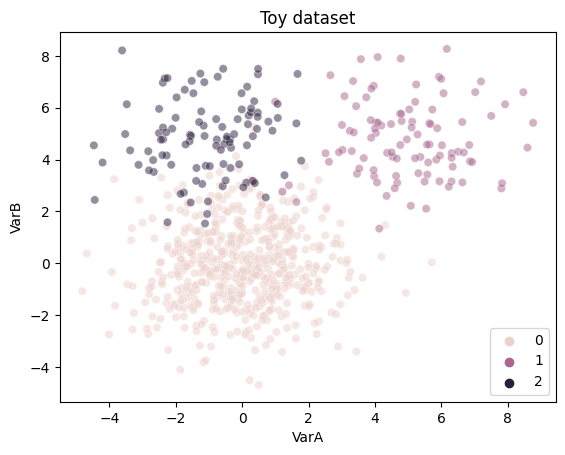

In [17]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [18]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

## Oversampling

0    534
1    534
2    534
dtype: int64


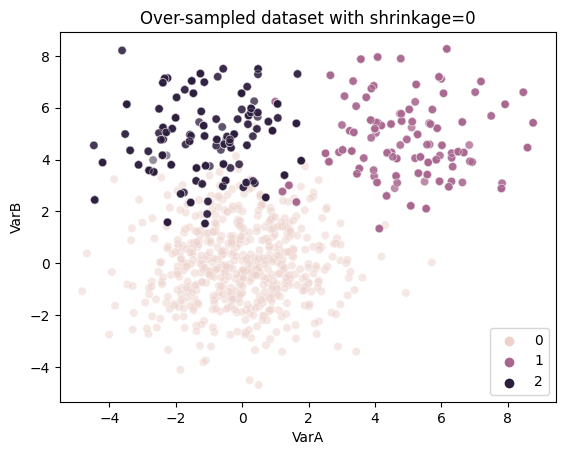

0    534
1    534
2    534
dtype: int64


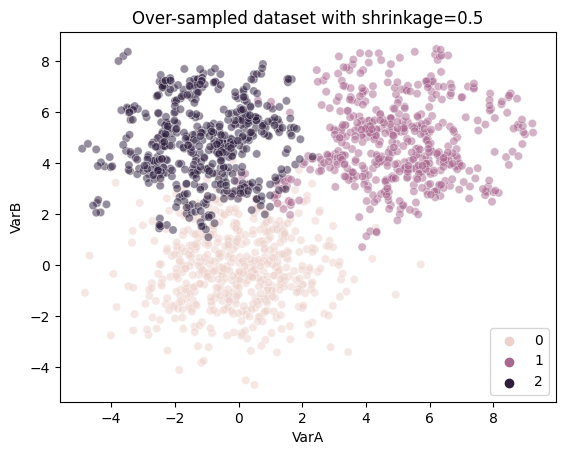

0    534
1    534
2    534
dtype: int64


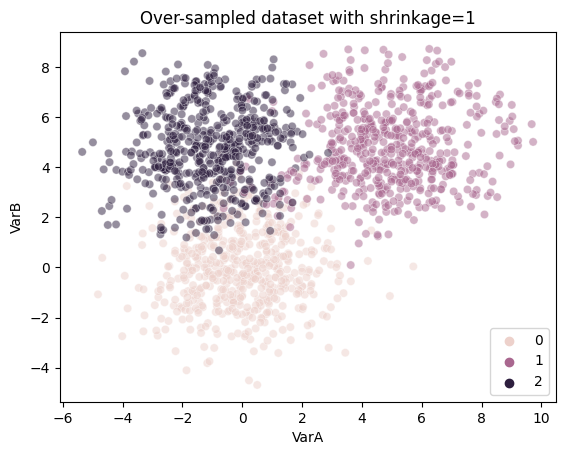

0    534
1    534
2    534
dtype: int64


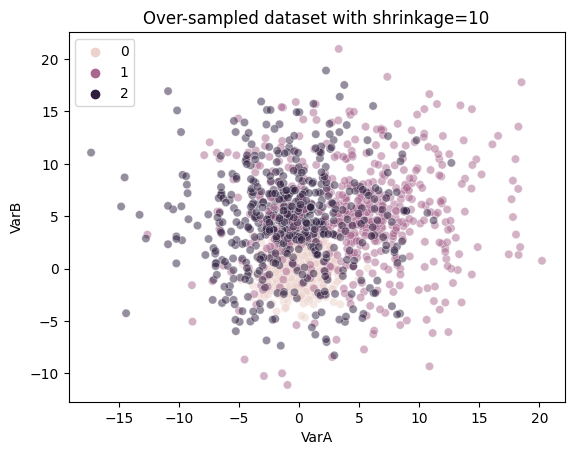

In [19]:
for shrink in [0, 0.5, 1, 10]:

    ros = RandomOverSampler(
        sampling_strategy='not majority', # samples all but majority class
        random_state=0,  # for reproducibility
        shrinkage = shrink,
    )  

    X_res, y_res = ros.fit_resample(X, y)
    print(y_res.value_counts())

    # plot of resampled data

    sns.scatterplot(
        data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
    )

    plt.title('Over-sampled dataset with shrinkage={}'.format(shrink))
    plt.show()

In [20]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

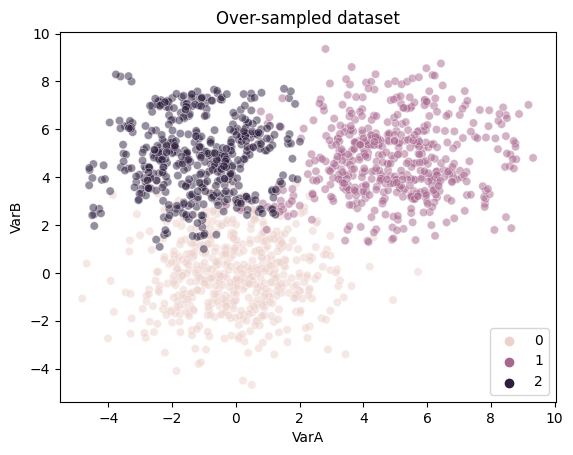

In [23]:
# we can also specify different shrinkage for different classes

ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500}, # we specify what to oversample
    random_state=0,  # for reproducibility
    shrinkage = {1:1, 2:0.5}
)  

X_res, y_res = ros.fit_resample(X, y)
# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [22]:
y_res.value_counts()

0    534
1    500
2    500
dtype: int64